In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df = pd.read_csv('../data/howpop_train.csv')

In [28]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [29]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), axis=1, inplace=True)

In [30]:
df.drop('url', axis=1, inplace=True)

In [31]:
df.head()

,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus
0,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0
1,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0
2,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0
3,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0
4,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0


In [32]:
df['published'].head()
print(df['published'].dtype)

object


In [33]:
df['published'] = pd.to_datetime(df['published'])

In [34]:
df['published'].head()

0   2008-01-01 18:19:00
1   2008-01-01 18:30:00
2   2008-01-01 18:34:00
3   2008-01-02 01:32:00
4   2008-01-02 14:34:00
Name: published, dtype: datetime64[ns]

In [35]:
print(df['published'].dtype)

datetime64[ns]


In [158]:
df['year'] = [i.year for i in df['published']]
df['month'] = [i.month for i in df['published']]
df['day'] = [i.day for i in df['published']]
df['week'] = [d.isoweekday() for d in df.published]

In [159]:
df.head().T

,0,1,2,3,4
domain,habr,habr,habr,habr,geek
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230
favs,0,1,72,36,6


In [62]:
df['author'].value_counts().sort_values(ascending = False).head(20)

@alizar              5292
@marks               4711
@SLY_G               1939
@ivansychev          1350
@semen_grinshtein    1171
@jeston              1060
@aleksandrit          633
@XaocCPS              603
@Mithgol              560
@Mordatyj             546
@Shapelez             537
@ilya42               512
@atomlib              452
@ragequit             444
@Tylerskald           439
@andorro              278
@jasiejames           213
@lozga                200
@Sterhel              191
@Jeditobe             181
Name: author, dtype: int64

In [67]:
top_users = df['author'].value_counts().sort_values(ascending = False).head(20).index.values

In [88]:
df['mark'] = [i <= 0 for i in df['votes_minus']]

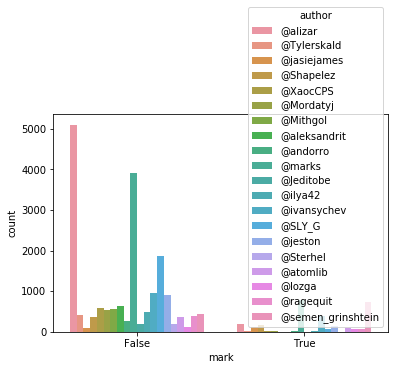

In [91]:
sns.countplot(x='mark', hue='author', data = df[df['author'].isin(top_users)]);

In [107]:
for i in top_users:
    print(i, "," , df[(df['author'] == i) & (df['mark'] == False)].shape[0] / df[df['author'] == i].shape[0])

@alizar , 0.963718820861678
@marks , 0.8320950965824666
@SLY_G , 0.960804538421867
@ivansychev , 0.7111111111111111
@semen_grinshtein , 0.3783091374893254
@jeston , 0.8537735849056604
@aleksandrit , 0.9968404423380727
@XaocCPS , 0.9701492537313433
@Mithgol , 1.0
@Mordatyj , 0.9798534798534798
@Shapelez , 0.6778398510242085
@ilya42 , 0.95703125
@atomlib , 0.7964601769911505
@ragequit , 0.8671171171171171
@Tylerskald , 0.9567198177676538
@andorro , 0.9712230215827338
@jasiejames , 0.48826291079812206
@lozga , 0.65
@Sterhel , 1.0
@Jeditobe , 0.994475138121547


,author,con
0,@alizar,0.963719
1,@marks,0.832095
2,@SLY_G,0.960805
3,@ivansychev,0.711111
4,@semen_grinshtein,0.378309


In [124]:
df1 = pd.read_csv('../data/mine_data.csv');
df1.head()

,author,proc
0,@alizar,0.963719
1,@marks,0.832095
2,@SLY_G,0.960805
3,@ivansychev,0.711111
4,@semen_grinshtein,0.378309


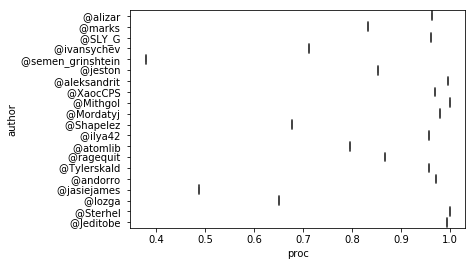

In [134]:
sns.boxplot(y = 'author', x='proc', data = df1)

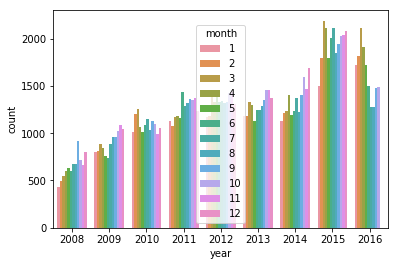

In [147]:
sns.countplot(x='year', hue='month', data=df)

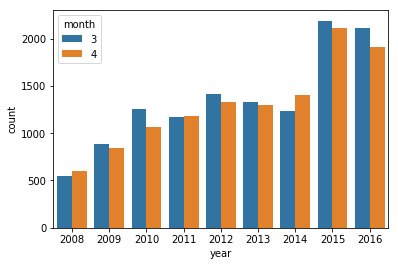

In [146]:
sns.countplot(x='year', hue='month', data=df[df['month'].isin([3, 4])])

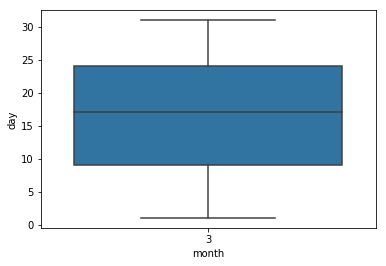

In [150]:
sns.boxplot(x='month', y='day', data=df[(df['month'] == 3) & (df['year'] == 2015)])

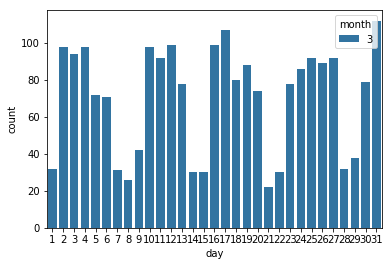

In [152]:
sns.countplot(hue='month', x='day', data=df[(df['month'] == 3) & (df['year'] == 2015)])

In [155]:
df["domain"] = df["domain"].map({"habrahabr.ru":"habr", "geektimes.ru":"geek"})

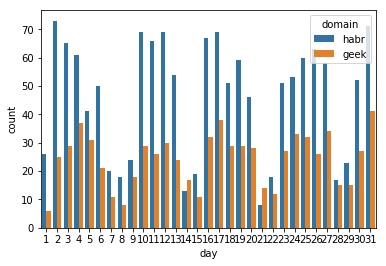

In [157]:
sns.countplot(x='day', hue='domain',  data=df[(df['month'] == 3) & (df['year'] == 2015) & (df['week'] == 6)])

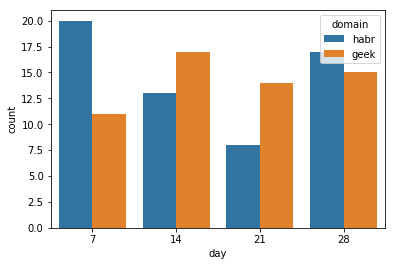

In [164]:
sns.countplot(x='day', hue='domain',  data=df[(df['month'] == 3) & (df['year'] == 2015) & (df['week'] == 6)])

In [165]:
df['hour'] = [d.hour for d in df.published]

In [171]:
df.groupby('hour')[['views']].mean().sort_values('views',
                                                 ascending=False).head()

,views
hour,
6,21354.310115
4,20678.389091
7,19093.953408
3,18370.017972
22,18365.387460


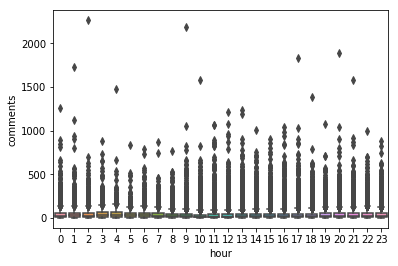

In [168]:
sns.boxplot(x='hour', y='comments', data=df)

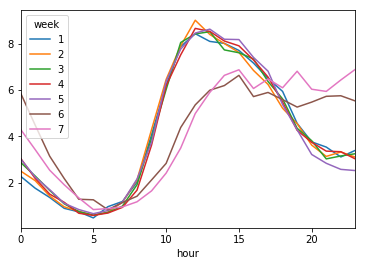

In [170]:
tmp_df = df.pivot_table(index='hour', values='title', 
                        aggfunc='count', columns='week')
tmp_df.apply(lambda x: 100. * x / tmp_df.sum(), axis = 1).plot();